<a href="https://colab.research.google.com/github/Abhishekconfused/NLP/blob/main/finalsubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train (1).csv")

In [ ]:
df.head()

,id,content,type
0,0,informed equifax numerous time account amount ...,credit_reporting
1,1,writing regard late payment credit report bank...,debt_collection
2,2,incorrectly report balance report asked experi...,credit_reporting
3,3,attempted investigate remove inaccurate inform...,credit_reporting
4,4,trying trade vehicle newer model told salesman...,credit_reporting


In [ ]:
df.shape

(32485, 3)

In [ ]:
df.isnull().sum()

id         0
content    1
type       0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

id         0
content    0
type       0
dtype: int64

In [ ]:
df['type'].value_counts()

type
credit_reporting       18235
debt_collection         4630
mortgages_and_loans     3798
credit_card             3114
retail_banking          2707
Name: count, dtype: int64

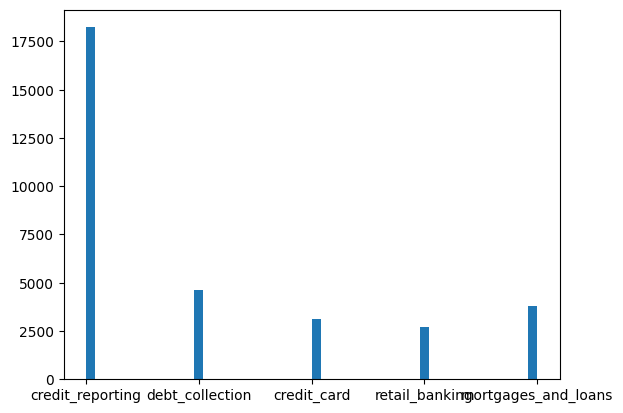

In [ ]:
plt.hist(df["type"],bins=50)
plt.show()

In [ ]:
import re
def preProcess(s):
    j = " ".join([re.sub(r"[0-9]*[X]*[X]+[/]*[0-9]*","",x) for x in s.split()])
    return j

In [ ]:
import nltk

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [ ]:
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def preprocess(x):
    x= x.apply(lambda x: preProcess(x))
    x= x.apply(lambda x: x.lower())
    x= x.apply(lambda x: remove_punctuation(x))
    x=x.apply(word_tokenize)
    x= x.apply(lambda x: remove_stopwords(x))
    x= x.apply(lambda x: stemming(x))
    x= x.apply(lambda x: lemmatizer(x))
    return x

In [ ]:
df["content"]=preprocess(df["content"])

In [ ]:
df["content"].head()

0    [inform, equifax, numer, time, account, amount...
1    [write, regard, late, payment, credit, report,...
2    [incorrectli, report, balanc, report, ask, exp...
3    [attempt, investig, remov, inaccur, inform, cr...
4    [tri, trade, vehicl, newer, model, told, sales...
Name: content, dtype: object

In [ ]:
df["concate"]=df["content"].apply(lambda x: ' '.join(x))
df["concate"]

0        inform equifax numer time account amount resul...
1        write regard late payment credit report bank a...
2        incorrectli report balanc report ask experian ...
3        attempt investig remov inaccur inform credit r...
4        tri trade vehicl newer model told salesman cou...
                               ...                        
32480    sent correct inform credit agenc updat address...
32481    schedul appoint keybank discu unemploy benefit...
32482    year wonder credit never consist never million...
32483    last day work tomorrow full week work employ f...
32484    look score three major credit bureau found mon...
Name: concate, Length: 32484, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=10992 )

In [ ]:
fea=vectorizer.fit_transform(df["concate"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["type"]=le.fit_transform(df["type"])

In [ ]:
df["type"].value_counts()

type
1    18235
2     4630
3     3798
0     3114
4     2707
Name: count, dtype: int64

In [ ]:
labels=df.type
labels

0        1
1        2
2        1
3        1
4        1
        ..
32480    1
32481    4
32482    1
32483    0
32484    1
Name: type, Length: 32484, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Rest of the code here

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fea, labels, random_state=51)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
l=LogisticRegression()

In [ ]:
l.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp=l.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
accuracy = accuracy_score(y_test,yp)
cr =classification_report(y_test,yp)
print("Logistics regression accuracy:",accuracy)
print("logistics regressionclassification report:\n",cr)

Logistics regression accuracy: 0.8553133850511021
logistics regressionclassification report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       797
           1       0.89      0.93      0.91      4592
           2       0.81      0.67      0.73      1147
           3       0.82      0.83      0.82       930
           4       0.84      0.85      0.85       655

    accuracy                           0.86      8121
   macro avg       0.83      0.80      0.81      8121
weighted avg       0.85      0.86      0.85      8121



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb=MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracyn = accuracy_score(y_test,y_pred)
crn =classification_report(y_test,y_pred)
print("Navie Bayes model accuracy:",accuracyn)
print("Navie Bayes classification report:\n",crn)

Navie Bayes model accuracy: 0.7752739810368181
Navie Bayes classification report:
               precision    recall  f1-score   support

           0       0.82      0.46      0.59       797
           1       0.75      0.98      0.85      4592
           2       0.90      0.31      0.46      1147
           3       0.83      0.72      0.77       930
           4       0.90      0.63      0.74       655

    accuracy                           0.78      8121
   macro avg       0.84      0.62      0.68      8121
weighted avg       0.80      0.78      0.75      8121



In [ ]:
fin=pd.read_csv("/content/drive/MyDrive/test (1).csv")

In [ ]:
fin["content"]=preprocess(fin["content"])

In [ ]:
fin["content"].head()

0                          [ive, victim, ident, theft]
1    [derogatori, mark, ad, credit, report, per, pe...
2    [transact, xoom, transact, xoom, process, tran...
3    [use, paypal, multipl, year, transfer, payout,...
4    [equifax, continu, report, neg, fradul, inform...
Name: content, dtype: object

In [ ]:
fin["concate"]=fin["content"].apply(lambda x: ' '.join(x))
fin["concate"]

0                                   ive victim ident theft
1        derogatori mark ad credit report per penn cred...
2        transact xoom transact xoom process transact w...
3        use paypal multipl year transfer payout sale b...
4        equifax continu report neg fradul inform credi...
                               ...                        
12989    open iddeal card pay engag ring receiv promot ...
12990    investig disput standard respons refer recogn ...
12991    ongo problem continu submit complaint enforc n...
12992    account close due fraudul glitch account close...
12993    recent check credit score notic unfamiliar ite...
Name: concate, Length: 12994, dtype: object

In [ ]:
features=vectorizer.fit_transform(fin["concate"])

In [ ]:
ypredicted=l.predict(features)

In [ ]:
final=pd.DataFrame(ypredicted)

credit_reporting       18235
debt_collection         4630
mortgages_and_loans     3798
credit_card             3114
retail_banking          2707

In [ ]:
final.replace(to_replace=[1,2,3,0,4],value=['credit_reporting','debt_collection','mortgages_and_loans','credit_card','retail_banking'],inplace=True)

In [ ]:
final.to_csv('file1.csv')